# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/weedprices01012015.csv')
#"~/Downloads/...) 

In [3]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


In [4]:
%matplotlib inline

## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [5]:
import numpy as np
np.nan

nan

In [6]:
df.loc[df['LowQ'] == 'I feel bad for these guys -->', 'LowQ'] = np.nan

In [7]:
df.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

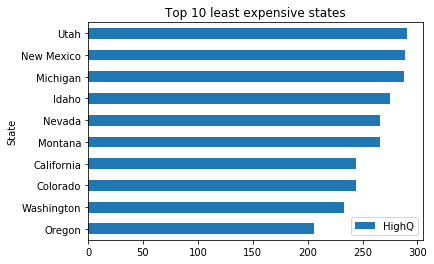

In [8]:
df.sort_values(by="HighQ").head(10).plot(kind='barh', x='State', y='HighQ', title='Top 10 least expensive states')

In [9]:
df.sort_values(by='HighQ', ascending=True).head(10)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32
22,Nevada,266.14,1237,226.59,1431,NaN,78
12,Idaho,275.37,450,245.14,672,NaN,35
34,Michigan,288.06,3990,270.77,3728,NaN,295
25,New Mexico,289.04,800,219.28,665,NaN,68
44,Utah,290.42,959,238.08,1055,NaN,62


## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [10]:
bottom_five = df.sort_values(by="HighQ").head(5)
bottom_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32


In [11]:
top_five = df.sort_values(by="HighQ", ascending=False).head(5)
top_five

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
32,Maryland,366.01,2863,255.84,2463,NaN,193
46,Virginia,364.95,3514,293.02,3085,NaN,285
15,Iowa,364.92,975,289.05,1045,NaN,122


In [12]:
pd.concat([bottom_five, top_five])

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32
28,North Dakota,393.94,213,339.60,327,NaN,23
45,Vermont,371.23,357,308.86,367,NaN,32
32,Maryland,366.01,2863,255.84,2463,NaN,193
46,Virginia,364.95,3514,293.02,3085,NaN,285
15,Iowa,364.92,975,289.05,1045,NaN,122


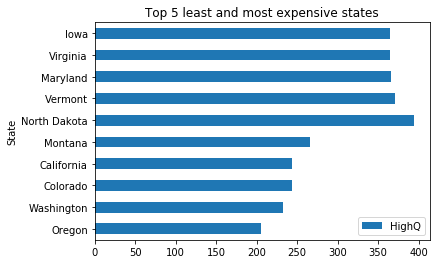

In [13]:
pd.concat([bottom_five, top_five], ignore_index=True).plot(kind='barh', x='State', y='HighQ', title='Top 5 least and most expensive states')

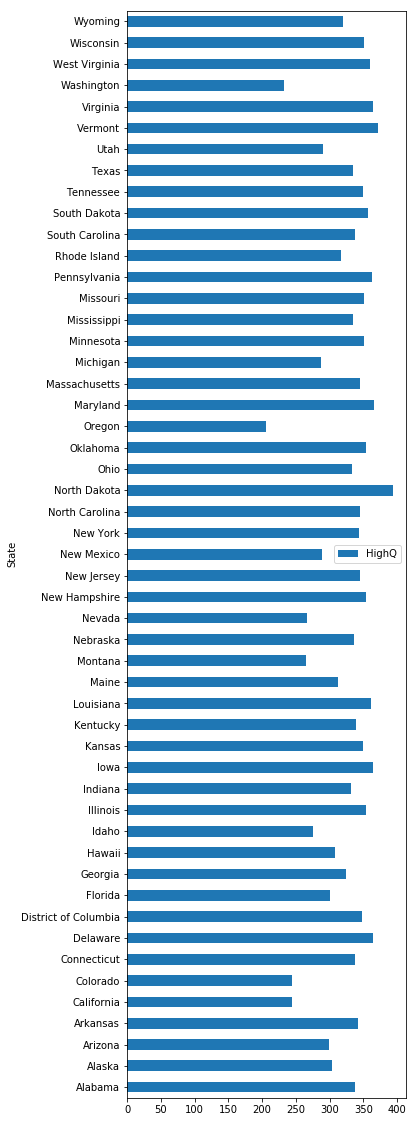

In [14]:
df.plot(x='State', y='HighQ', kind='barh', figsize=(5,20))

## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

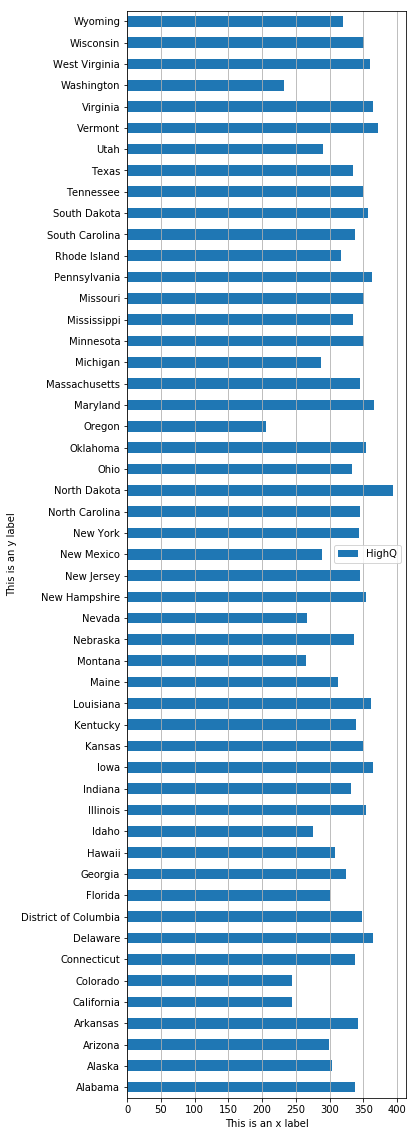

In [16]:
ax = df.plot(x='State', y='HighQ', kind='barh', figsize=(5,20))
ax.set_xlabel("This is an x label")
ax.set_ylabel("This is an y label")
ax.grid(axis='x')

In [16]:
# Let's say we wanted a new column called 'feelings' and if price is > 300  i say it's expensive 
# df.loc[df.HighQ > 300, 'feelings'] = 'expensive'
# df.head() 
# if I want to copy a column over / give me everything where Highq > and we are going to 
# update a column named 'diff'
# df.loc[df.HighQ > 300, 'diff'] = df.HighQ - df.MedQ
# instead of me doing
# df['diff'] = df.HighQ - df.MedQ 

In [17]:
# df['diff'].fillna(method='ffill')
# It drag values to columns that would otherwise be empty 

In [18]:
# Make me a new dataframe for everywhere that feelings is not null
# new_df = df[df.feelings.notnull()]

In [19]:
# dropna
# inplace = True if I wanted to permanently delete them
# new_df = df.dropna(subset=['feelings'])

In [20]:
#df[~df.Country.str.contains("stan$, na=False)]
# all the countries that don't end in stn

# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [17]:
import glob

In [18]:
filenames = glob.glob("data/*.csv")
filenames

['data/weedprices01012014.csv',
 'data/weedprices01012015.csv',
 'data/weedprices01022014.csv',
 'data/weedprices01022015.csv',
 'data/weedprices01032014.csv',
 'data/weedprices01042014.csv',
 'data/weedprices01052014.csv',
 'data/weedprices01062014.csv',
 'data/weedprices01062015.csv',
 'data/weedprices01072014.csv',
 'data/weedprices01072015.csv',
 'data/weedprices01082014.csv',
 'data/weedprices01092014.csv',
 'data/weedprices01102014.csv',
 'data/weedprices01112014.csv',
 'data/weedprices01122014.csv',
 'data/weedprices02012014.csv',
 'data/weedprices02012015.csv',
 'data/weedprices02022014.csv',
 'data/weedprices02022015.csv',
 'data/weedprices02032014.csv',
 'data/weedprices02042014.csv',
 'data/weedprices02052014.csv',
 'data/weedprices02062014.csv',
 'data/weedprices02062015.csv',
 'data/weedprices02072014.csv',
 'data/weedprices02072015.csv',
 'data/weedprices02092014.csv',
 'data/weedprices02102014.csv',
 'data/weedprices02112014.csv',
 'data/weedprices02122014.csv',
 'data/w

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [19]:
price_dfs = [pd.read_csv(file) for file in filenames]
price_dfs
len(price_dfs)

491

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [20]:
df.head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37


In [21]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [22]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [27]:
#numbers = [100, 200, 500]
#names = ['Billy', 'Benny', 'Bobby']
#zip allows you to loop through TWO THINGS at once!
#for number, name in zip(numbers, names):
    #print(number, name)

In [23]:
for filename, dataframe in zip(filenames, price_dfs):
    print("Looking at", filename)
    dataframe['filename'] = filename
# first filename and add it to the first dataframe and keep track of where this data came from
# second filename and add it to the second dataframe

Looking at data/weedprices01012014.csv
Looking at data/weedprices01012015.csv
Looking at data/weedprices01022014.csv
Looking at data/weedprices01022015.csv
Looking at data/weedprices01032014.csv
Looking at data/weedprices01042014.csv
Looking at data/weedprices01052014.csv
Looking at data/weedprices01062014.csv
Looking at data/weedprices01062015.csv
Looking at data/weedprices01072014.csv
Looking at data/weedprices01072015.csv
Looking at data/weedprices01082014.csv
Looking at data/weedprices01092014.csv
Looking at data/weedprices01102014.csv
Looking at data/weedprices01112014.csv
Looking at data/weedprices01122014.csv
Looking at data/weedprices02012014.csv
Looking at data/weedprices02012015.csv
Looking at data/weedprices02022014.csv
Looking at data/weedprices02022015.csv
Looking at data/weedprices02032014.csv
Looking at data/weedprices02042014.csv
Looking at data/weedprices02052014.csv
Looking at data/weedprices02062014.csv
Looking at data/weedprices02062015.csv
Looking at data/weedprice

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [24]:
df_new = pd.concat(price_dfs, ignore_index=True)
df_new

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv


In [25]:
df_new.shape

(24990, 8)

## Pull out the day, month and year from each filename

Do **not** store it back yet!

In [26]:
df_new['day'] = df_new['filename'].str.extract('.*(\d\d)\d\d\d\d\d\d', expand=False)

In [27]:
df_new['month'] = df_new['filename'].str.extract('.*\d\d(\d\d)\d\d\d\d', expand=False)

In [28]:
df_new['year'] = df_new['filename'].str.extract('.*\d\d\d\d(\d\d\d\d)', expand=False)

In [29]:
df_new

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,day,month,year
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv,01,01,2014
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv,01,01,2014
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv,01,01,2014
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv,01,01,2014
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv,01,01,2014


In [30]:
extracted = df_new['filename'].str.extract('.*(\d\d)(\d\d)(\d\d\d\d)', expand = False)
extracted

,0,1,2
0,01,01,2014
1,01,01,2014
2,01,01,2014
3,01,01,2014
4,01,01,2014
5,01,01,2014
6,01,01,2014
7,01,01,2014
8,01,01,2014
9,01,01,2014


In [31]:
extracted.columns = ['date','month','year']

In [32]:
pd.concat([df, extracted], axis=1)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,337.54,1539.0,208.24,1463.0,NaN,182.0,01,01,2014
1,Alaska,303.02,350.0,270.45,475.0,NaN,37.0,01,01,2014
2,Arizona,298.51,2638.0,209.43,2426.0,NaN,306.0,01,01,2014
3,Arkansas,341.68,846.0,207.20,836.0,NaN,145.0,01,01,2014
4,California,243.96,16512.0,189.35,19151.0,NaN,1096.0,01,01,2014
5,Colorado,243.72,3148.0,195.11,2877.0,NaN,178.0,01,01,2014
6,Connecticut,337.26,1835.0,267.99,2069.0,NaN,126.0,01,01,2014
7,Delaware,364.19,490.0,234.72,431.0,NaN,41.0,01,01,2014
8,District of Columbia,348.66,657.0,281.93,578.0,NaN,49.0,01,01,2014
9,Florida,300.88,9369.0,217.05,8166.0,NaN,695.0,01,01,2014


In [38]:
#extracted = df.sentence.str.extract("My name is" (.*) and I love (.*)", expand=True)
# side by side not on top of each other 
#pd.concat([df, exctracted], axis=1)
# or we can merge
# extracted.columns = ['name', 'food']
#extracted.head 

## Okay, now add all three columns back at once

You should rename the columns first!

## Plot the change in marijuana prices in Oregon over time

## Plot the change in marijuana prices in all states over time